决策树：分支代表判断结果的输出，叶节点代表分类结果
信息熵：越低越有序，Ent(D) = -（p1 * logp1 + p2 * logp2 + ... + p16 * logp16）
信息增益：以某特征划分数据集前后的熵的差值，划分数据好坏，为信息熵-条件熵（ID3决策树算法）
计算a特征信息熵，先计算整体信息熵，然后计算特征a各类别属性信息熵，该其中一条属性*该属性正样本比例作为条件熵，整体熵减去全部条件熵为a特征信息熵为信息增益
信息增益率；信息增益对较多属性类别的属性有选择偏好，使用信息增益率（c4.5决策树能更好的解决这问题）
即信息熵/分裂信息度量（该特征关乎自身信息熵）
c4.5避免树高度无节制增长，避免过度拟合

基尼值和基尼指数(cart决策树)
是否拖欠贷款 是3 否7， 有房拖欠 0 有房不拖欠 3 无房拖欠 3 无房不拖欠4
根结点基尼值：Gini=1-3/10*3/10 -7/10*7/10=0.42
是否有房基尼指数， 左基尼值 1-0/3*0/3-3/3*3/3=0
                右基尼值 1-3/7*3/7-4/7*4/7=0.4898
                基尼指数 3/10*0 + 7/10*0.498=0/343
求的各特征后选最小基尼指数
剩余再次进行循环

id3倾向选择值较多的属性，只能处理离散数据集
c4.5后剪枝方式，可处理连续数值，对缺失值处理好，但由于需要多次扫描及排序，效率低，内存占用大
cart 采用简化的二叉树形式
实际中采用多变量特征树，即由一组特征决定比如oc1
决策树中的两种类型：数字型，需要排序并分割条件，利用分割情况简化时间复杂度，名称型：枚举
决策树构建是一种贪心算法

剪支方法
预剪枝
在构建树的过程中，同时剪枝,限制节点最小样本数,指定数据高度,指定熵值的最小值
后剪枝
把一棵树，构建完成之后，再进行从下往上的剪枝

岔话题 特征提取
字典特征提取
字典特征提取就是对类别型数据进行转换，做one-hot编码处理
api:sklearn.feature_extraction.DictVectorizer(sparse=True,…)
文本特征提取 英文api:sklearn.feature_extraction.text.CountVectorizer(stop_words=[]
           中文jieba分词
tfidf 在一篇文章中出现的概率高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力
tf -- 词频idf -- 逆向文档频率
如⼀篇⽂章的总词语数是100个，⽽词语"⾮常"出现了5次，那么"⾮常"⼀词在该⽂件中的词频就是5/100=0.05。
如果"⾮常"⼀词在1,0000份⽂件出现过，⽽⽂件总数是10,000,000份的话，其逆向⽂件频率就是lg（10,000,000	/	1,0000）=3。最后"⾮常"对于这篇⽂档的tf-idf的分数为0.05	*	3=0.15
api:sklearn.feature_extraction.text.TfidfVectorizer

决策树api
class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, max_depth=None,random_state=None)
criterion
特征选择标准
"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一默认"gini"，即CART算法。
min_samples_split
内部节点再划分所需最小样本数
这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。我之前的一个项目例子，有大概10万样本，建立决策树时，我选择了min_samples_split=10。可以作为参考。
min_samples_leaf
叶子节点最少样本数
这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。之前的10万样本项目使用min_samples_leaf的值为5，仅供参考。
max_depth
决策树最大深度
决策树的最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间
random_state
随机数种子

回归决策树
决策树可分为回归决策树和分类决策树，前者主要用于处理离散数据，后者处理连续性数据
在回归树中，采⽤的是启发式的⽅法。假如我们有n个特征，每个特征有s(i∈(1,n))个取值，那我们遍历所有特征，尝试该特征所有取值，对空间进⾏划分，直到取到特征	j	的取值	s，使得损失函数最⼩，这样就得到了⼀个划分点


In [13]:
#字典数据提取
from sklearn.feature_extraction import DictVectorizer

data = [{'city': '北京', 'temperature': 100}, {'city': '上海', 'temperature': 60}, {'city': '深圳', 'temperature': 30}]
transfer = DictVectorizer(sparse=False)
# transfer = DictVectorizer(sparse=True)
data = transfer.fit_transform(data)
print(data)
print(transfer.get_feature_names_out())

[[  0.   1.   0. 100.]
 [  1.   0.   0.  60.]
 [  0.   0.   1.  30.]]
['city=上海' 'city=北京' 'city=深圳' 'temperature']


In [26]:
#文本特征提取
from sklearn.feature_extraction.text import CountVectorizer

d = ["life is	short,i	like	like	python", "life	is	too	long,i dislike	dislike	python"]
transfer2 = CountVectorizer()
d = transfer2.fit_transform(d)
#句子索引 0，1 单词索引 names
print(d)
#矩阵形式
print(d.toarray())
print(transfer2.get_feature_names_out())

  (0, 2)	1
  (0, 1)	1
  (0, 6)	1
  (0, 3)	2
  (0, 5)	1
  (1, 2)	1
  (1, 1)	1
  (1, 5)	1
  (1, 7)	1
  (1, 4)	1
  (1, 0)	2
['dislike' 'is' 'life' 'like' 'long' 'python' 'short' 'too']
[[0 1 1 2 0 1 1 0]
 [2 1 1 0 1 1 0 1]]


In [32]:
#中文分词
from sklearn.feature_extraction.text import CountVectorizer
import jieba

data = ["⼀种还是⼀种今天很残酷，明天更残酷，后天很美好，但绝对⼤部分是死在明天晚上，所以每个⼈不要放弃今天。",
        "我们看到的从很远星系来的光是在⼏百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
        "如果只⽤⼀种⽅式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]

text_list = []
for word in data:
    text_list.append(" ".join(jieba.cut(word)))
transfer = CountVectorizer()
data = transfer.fit_transform(text_list)
print(data.toarray())
print(transfer.get_feature_names_out())
print(text_list)

[[0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 1 1 2 0 1 0 2 1 0 0 0 0 1 1 0 0 1 0 1]
 [0 0 1 0 0 0 1 1 0 0 0 0 0 1 3 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0 1 0 1 0]
 [1 0 0 4 3 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 2 1 0 0 1 0 0 0 0]]
['不会' '不要' '之前' '了解' '事物' '今天' '光是在' '发出' '取决于' '后天' '含义' '如何' '如果' '宇宙'
 '我们' '所以' '放弃' '明天' '星系' '晚上' '某样' '残酷' '每个' '百万年' '看到' '真正' '秘密' '绝对'
 '美好' '联系' '过去' '还是' '这样' '部分']
['⼀ 种 还是 ⼀ 种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 ⼤ 部分 是 死 在 明天 晚上 ， 所以 每个 ⼈ 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 ⼏ 百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只 ⽤ ⼀ 种 ⽅ 式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']


In [35]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

data = ["⼀种还是⼀种今天很残酷，明天更残酷，后天很美好，但绝对⼤部分是死在明天晚上，所以每个⼈不要放弃今天。",
        "我们看到的从很远星系来的光是在⼏百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
        "如果只⽤⼀种⽅式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]

text_list = []
for word in data:
    text_list.append(" ".join(jieba.cut(word)))

transfer = TfidfVectorizer(stop_words=['一种', '不会', '不要'])
data = transfer.fit_transform(text_list)
print(data.toarray())
print(transfer.get_feature_names_out())

[[0.         0.         0.         0.43643578 0.         0.
  0.         0.21821789 0.         0.         0.         0.
  0.         0.21821789 0.21821789 0.43643578 0.         0.21821789
  0.         0.43643578 0.21821789 0.         0.         0.
  0.         0.21821789 0.21821789 0.         0.         0.21821789
  0.         0.21821789]
 [0.2410822  0.         0.         0.         0.2410822  0.2410822
  0.         0.         0.         0.         0.         0.2410822
  0.55004769 0.         0.         0.         0.2410822  0.
  0.         0.         0.         0.2410822  0.48216441 0.
  0.         0.         0.         0.         0.2410822  0.
  0.2410822  0.        ]
 [0.         0.6613748  0.4960311  0.         0.         0.
  0.1653437  0.         0.1653437  0.1653437  0.1653437  0.
  0.12574815 0.         0.         0.         0.         0.
  0.1653437  0.         0.         0.         0.         0.3306874
  0.1653437  0.         0.         0.1653437  0.         0.
  0.         

In [36]:
#泰坦尼克号案例

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor

#1.获取数据
#"http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt"
titan = pd.read_csv('数据丢了')
#2.数据基本处理
#2.1	确定特征值,⽬标值
x = titan[["pclass", "age", "sex"]]
y = titan["survived"]
#2.2	缺失值处理
x['age'].fillna(x['age'].mean(), inplace=True)
#2.3	数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)
#3.特征⼯程(字典特征抽取)
#需要将类别符号进行one-hot编码处理
transfer = DictVectorizer(sparse=False)
x_train = transfer.fit_transform(x_train.to_dict(orient="records"))
x_test = transfer.fit_transform(x_test.to_dict(orient="records"))
# 4.机器学习(决策树)
estimator = DecisionTreeClassifier(criterion="entropy", max_depth=5)
estimator.fit(x_train, y_train)
# 5.模型评估
estimator.score(x_test, y_test)
#6 模型预测
estimator.predict(x_test)

FileNotFoundError: [Errno 2] No such file or directory: '数据丢了'

In [ ]:
#决策树可视化
export_graphviz(estimator, out_file="./data/tree.dot",
                feature_names=['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', '⼥性', '男性'])
#⽹站显示结构
#http://webgraphviz.com/

In [38]:
#回归树和线性回归对比

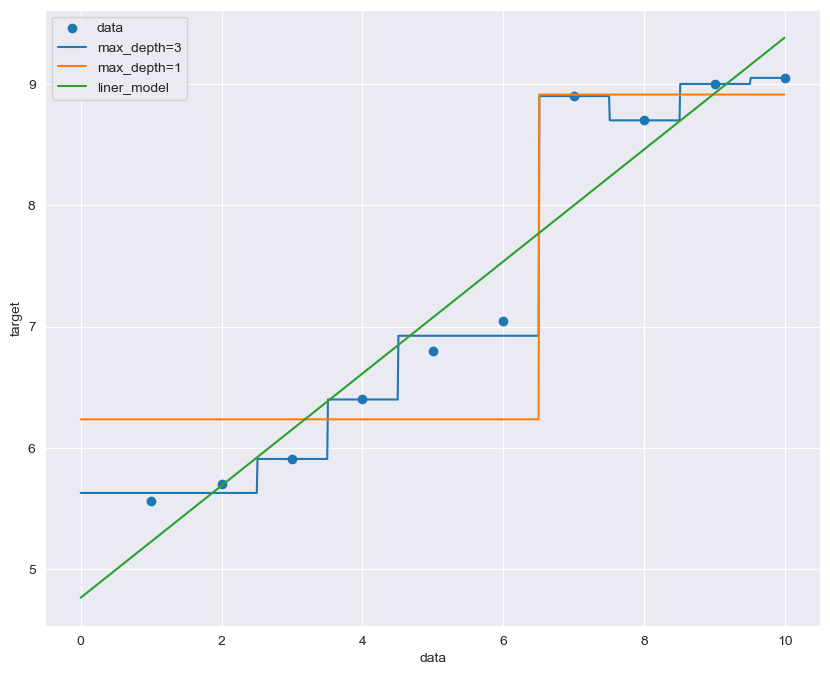

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([5.56, 5.70, 5.91, 6.40, 6.80, 7.05, 8.90, 8.70, 9.00, 9.05])

model1 = DecisionTreeRegressor(max_depth=3)
model2 = DecisionTreeRegressor(max_depth=1)
model3 = LinearRegression()

model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

x_test = np.arange(0.0, 10.0, 0.01).reshape(-1, 1)
y_1 = model1.predict(x_test)
y_2 = model2.predict(x_test)
y_3 = model3.predict(x_test)

plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='data')
plt.plot(x_test, y_1, label='max_depth=3')
plt.plot(x_test, y_2, label='max_depth=1')
plt.plot(x_test, y_3, label='liner_model')

plt.xlabel("data")
plt.ylabel("target")
plt.legend()